# Overfitting vs Underfitting

### Occam's Razor -

Try to choose a simpler model but not too simple.

### Why to choose simpler models?

Reason - Simple models are GENERALIZABLE. i.e. thier performance on unseen data is better.

Way too Complex Models - If a model is way too complex, it will overfit the training data.

Way too Simple Models - If a model is way too simple, it will underfit the training data.

### What do you mean by complex models?

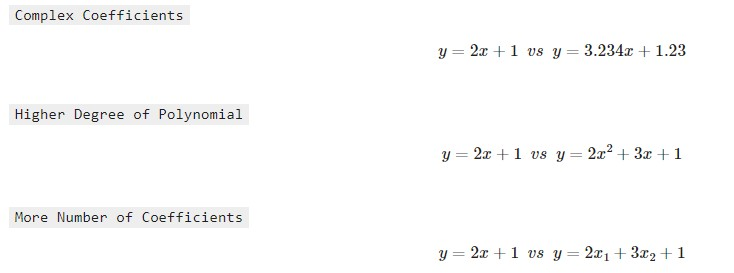

### What is OVERFITTING and UNDERFITTING?

**Overfitting** - When a model learns the pattern and noise in the data to such extent that it hurts the performance of the model on the new dataset, is termed overfitting. The model fits the data so well that it interprets noise as patterns in the data.

**Underfitting** - When the model is not able to capture the underlying trend/pattern in the data hence hurting the performance of the model in the new dataset, it is called as underfitting. It can be easily tackeled by increasing the complexity of the model.

### How to avoid Overfitting?

1. Get more data
2. Data Augmentation
3. Early Stopping
4. Dropouts (for DL)
5. Feature Engineering
- Feature Transformation
- Feature Selection
6. Regularization
7. Ensembles

### Model Complexity vs Train Test Error

**Way too Complex Models** - OVERFITTING - Low Train Error and High Test Error

**Way too Simple Models** - UNDERFITTING - High Train Error and High Test Error

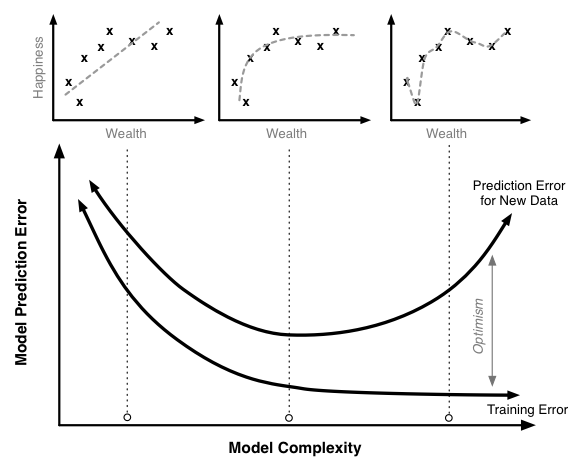

### Bias Variance Tradeoff

**Way too Complex Models** - OVERFITTING - High **Variance** and Low Bias

**Way too Simple Models** - UNDERFITTING - High **Bias** and Low Variance
BUVO

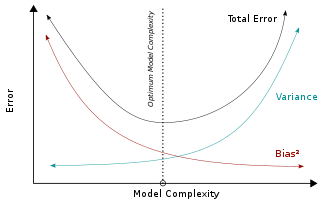

# Hyperparameter Tuning

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 1.000, test: 1.000
> 2, train: 0.975, test: 0.967
> 3, train: 0.950, test: 0.967
> 4, train: 0.950, test: 1.000
> 5, train: 0.950, test: 0.967
> 6, train: 0.958, test: 1.000
> 7, train: 0.967, test: 1.000
> 8, train: 0.967, test: 1.000
> 9, train: 0.958, test: 1.000
> 10, train: 0.967, test: 1.000
> 11, train: 0.958, test: 1.000
> 12, train: 0.975, test: 1.000
> 13, train: 0.958, test: 1.000
> 14, train: 0.975, test: 1.000
> 15, train: 0.958, test: 1.000
> 16, train: 0.967, test: 1.000
> 17, train: 0.958, test: 1.000
> 18, train: 0.958, test: 1.000
> 19, train: 0.950, test: 1.000
> 20, train: 0.950, test: 1.000


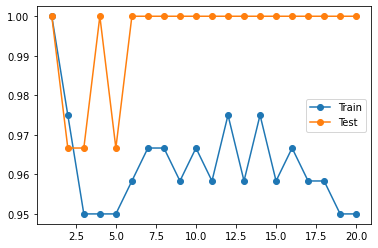

In [8]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.692, test: 0.567
> 2, train: 0.958, test: 0.967
> 3, train: 0.967, test: 0.967
> 4, train: 0.992, test: 1.000
> 5, train: 1.000, test: 1.000
> 6, train: 1.000, test: 1.000
> 7, train: 1.000, test: 1.000
> 8, train: 1.000, test: 1.000
> 9, train: 1.000, test: 1.000
> 10, train: 1.000, test: 1.000
> 11, train: 1.000, test: 1.000
> 12, train: 1.000, test: 1.000
> 13, train: 1.000, test: 1.000
> 14, train: 1.000, test: 1.000
> 15, train: 1.000, test: 1.000
> 16, train: 1.000, test: 1.000
> 17, train: 1.000, test: 1.000
> 18, train: 1.000, test: 1.000
> 19, train: 1.000, test: 1.000
> 20, train: 1.000, test: 1.000


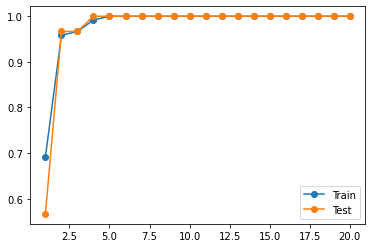

In [10]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Cross Validation

## GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [15]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set
{'n_neighbors': 8, 'p': 3}
KNeighborsClassifier(n_neighbors=8, p=3)

Score on Test Data:  1.0


In [16]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004837,0.003953,0.008301,0.005272,1,1,"{'n_neighbors': 1, 'p': 1}",0.916667,0.875000,1.0,...,0.941667,0.050000,64,1.00000,1.000000,1.00000,1.00000,1.00000,1.000000,0.000000
1,0.003201,0.003920,0.001601,0.003201,1,2,"{'n_neighbors': 1, 'p': 2}",0.916667,0.875000,1.0,...,0.941667,0.050000,64,1.00000,1.000000,1.00000,1.00000,1.00000,1.000000,0.000000
2,0.003244,0.003974,0.003201,0.003920,1,3,"{'n_neighbors': 1, 'p': 3}",0.916667,0.875000,1.0,...,0.941667,0.050000,64,1.00000,1.000000,1.00000,1.00000,1.00000,1.000000,0.000000
3,0.000000,0.000000,0.008047,0.000085,2,1,"{'n_neighbors': 2, 'p': 1}",0.916667,0.833333,1.0,...,0.925000,0.055277,118,0.96875,0.989583,0.96875,0.96875,0.96875,0.972917,0.008333
4,0.003201,0.003920,0.004851,0.003962,2,2,"{'n_neighbors': 2, 'p': 2}",0.916667,0.833333,1.0,...,0.925000,0.055277,118,0.96875,0.989583,0.96875,0.96875,0.96875,0.972917,0.008333


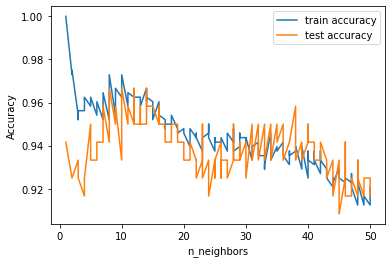

In [17]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

## RandomizedSearchCV

In [18]:
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [19]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16, p=1)

Score on Test Data:  1.0


## Support Vector Machines

In [20]:
from sklearn.svm import SVC

In [21]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    estimator=SVC(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': array([0.01471794, 0.70258627, 0.63843154]),
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')

Score on Test Data:  1.0
